# 台灣銀行牌告匯率爬蟲練習
## 範例1： 練習爬取台幣對其他貨幣匯率資料

In [1]:
import requests
from bs4 import BeautifulSoup
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

### 進入台灣銀行牌告匯率網頁：https://rate.bot.com.tw/xrt?Lang=zh-TW ，擷取當日台幣對美金的匯率資訊

In [2]:
# 進入台灣銀行牌告匯率網頁，查看當日匯率資料
url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"
resp = requests.get(url)
resp.encoding = 'utf-8'
# print(resp.text)  # 如有需要，列印出網頁原始碼

html = BeautifulSoup(resp.text, "lxml")
rate_table = html.find(name='table', attrs={'title':'牌告匯率'}).find(name='tbody').find_all(name='tr')

# 查詢美金(也就是匯率表的第一個元素)對台幣的匯率
currency = rate_table[0].find(name='div', attrs={'class':'visible-phone print_hide'})
print(currency.get_text().replace(" ", ""))  # 去掉空白

buy_rate = rate_table[0].find(name='td', attrs={'data-table':'本行現金買入'})
sell_rate = rate_table[0].find(name='td', attrs={'data-table':'本行現金賣出'})
print("即時現金買入: %s, 即時現金賣出: %s" % (buy_rate.get_text(), sell_rate.get_text()))


美金(USD)

即時現金買入: 27.6, 即時現金賣出: 28.27


### 作業part 1：請參考上面的範例，試著爬取所有貨幣對台幣的匯率

In [8]:
'''

  Your code here
  
'''
for i, d in enumerate(rate_table):
    try:
        currency = rate_table[i].find("div", attrs={"class": "visible-phone print_hide"})
        print(currency.get_text().replace(" ","").replace("\n", ""))
        buy_rate = rate_table[i].find("td", attrs={"data-table": "本行現金買入"})
        sell_rate = rate_table[i].find("td", attrs={"data-table": "本行現金賣出"})
        print("即時現金買入: %s, 即時現金賣出: %s" %(buy_rate.get_text(), sell_rate.get_text()))
        print("-"*40)
    except:
        print("-"*40)
        continue

美金(USD)
即時現金買入: 27.6, 即時現金賣出: 28.27
----------------------------------------
港幣(HKD)
即時現金買入: 3.456, 即時現金賣出: 3.66
----------------------------------------
英鎊(GBP)
即時現金買入: 36.86, 即時現金賣出: 38.98
----------------------------------------
澳幣(AUD)
即時現金買入: 21.18, 即時現金賣出: 21.96
----------------------------------------
加拿大幣(CAD)
即時現金買入: 21.5, 即時現金賣出: 22.41
----------------------------------------
新加坡幣(SGD)
即時現金買入: 20.48, 即時現金賣出: 21.39
----------------------------------------
瑞士法郎(CHF)
即時現金買入: 30.62, 即時現金賣出: 31.82
----------------------------------------
日圓(JPY)
即時現金買入: 0.2603, 即時現金賣出: 0.2731
----------------------------------------
南非幣(ZAR)
即時現金買入: -, 即時現金賣出: -
----------------------------------------
瑞典幣(SEK)
即時現金買入: 2.95, 即時現金賣出: 3.47
----------------------------------------
紐元(NZD)
即時現金買入: 19.52, 即時現金賣出: 20.37
----------------------------------------
泰幣(THB)
即時現金買入: 0.8028, 即時現金賣出: 0.9928
----------------------------------------
菲國比索(PHP)
即時現金買入: 0.5093, 即時現金賣出: 0.6423
------------------------

## 範例2：爬取一個月的美金對台幣歷史匯率資料，並畫出趨勢圖


美金(USD)



<Figure size 720x576 with 0 Axes>

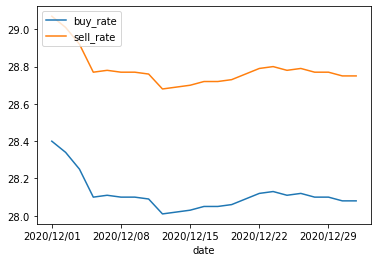

In [9]:
# 先到牌告匯率首頁，爬取所有貨幣的種類
url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"
resp = requests.get(url)
resp.encoding = 'utf-8'
html = BeautifulSoup(resp.text, "lxml")
rate_table = html.find(name='table', attrs={'title':'牌告匯率'}).find(name='tbody').find_all(name='tr')

# 擷取匯率表格，把美金(也就是匯率表的第一個元素)擷取出來，查詢其歷史匯率
currency = rate_table[0].find(name='div', attrs={'class':'visible-phone print_hide'})
print(currency.get_text().replace(" ", ""))  # 貨幣種類

# 針對美金，找到其「歷史匯率」的首頁 
history_link = rate_table[0].find(name='td', attrs={'data-table':'歷史匯率'})
history_rate_link = "https://rate.bot.com.tw" + history_link.a["href"]  # 該貨幣的歷史資料首頁

#
# 到貨幣歷史匯率網頁，選則該貨幣的「歷史區間」，送出查詢後，觀察其網址變化情形，再試著抓取其歷史匯率資料
#
# 用「quote/年-月」去取代網址內容，就可以連到該貨幣的歷史資料
quote_history_url = history_rate_link.replace("history", "quote/2020-12")
resp = requests.get(quote_history_url)
resp.encoding = 'utf-8'
history = BeautifulSoup(resp.text, "lxml")
history_table = history.find(name='table', attrs={'title':'歷史本行營業時間牌告匯率'}).find(name='tbody').find_all(name='tr')

#
# 擷取到歷史匯率資料後，把資料彙整起來並畫出趨勢圖
#
date_history = list()
history_buy = list()
history_sell = list()

for history_rate in history_table:
    # 擷取日期資料
    date_string = history_rate.a.get_text()
    date = datetime.strptime(date_string, '%Y/%M/%d').strftime('%Y/%M/%d')  # 轉換日期格式
    date_history.append(date)  # 日期歷史資料

    history_ex_rate = history_rate.find_all(name='td', attrs={'class':'rate-content-cash text-right print_table-cell'})
    history_buy.append(float(history_ex_rate[0].get_text()))  # 歷史買入匯率
    history_sell.append(float(history_ex_rate[1].get_text()))  # 歷史賣出匯率

# 將匯率資料建成dataframe形式
HistoryExchangeRate = pd.DataFrame({'date': date_history,
                                    'buy_rate':history_buy,
                                    'sell_rate':history_sell})

HistoryExchangeRate = HistoryExchangeRate.set_index('date')  # 指定日期欄位為datafram的index
HistoryExchangeRate = HistoryExchangeRate.sort_index(ascending=True)

# 畫出歷史匯率軌跡圖
plt.figure(figsize=(10, 8))
HistoryExchangeRate[['buy_rate','sell_rate']].plot()  # x=['date'], y=[['buy_rate','sell_rate']] 
plt.legend(loc="upper left")
plt.show()

### 作業part 2：爬取每種貨幣對台幣的一個月歷史匯率資料，並畫出趨勢圖


美金(USD)



<Figure size 720x576 with 0 Axes>

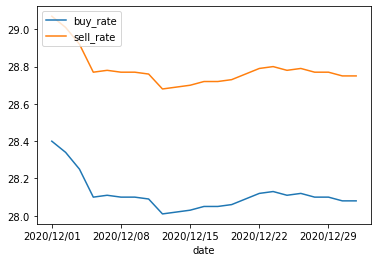

----------------------------------------

港幣(HKD)



<Figure size 720x576 with 0 Axes>

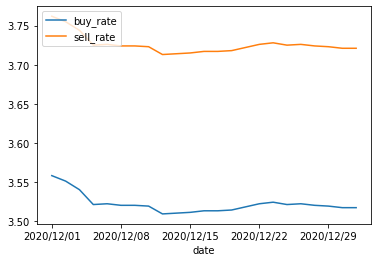

----------------------------------------

英鎊(GBP)



<Figure size 720x576 with 0 Axes>

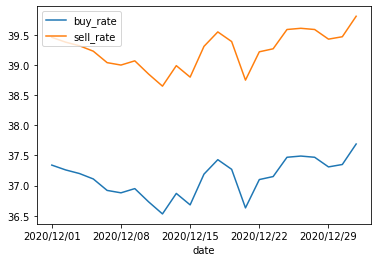

----------------------------------------

澳幣(AUD)



<Figure size 720x576 with 0 Axes>

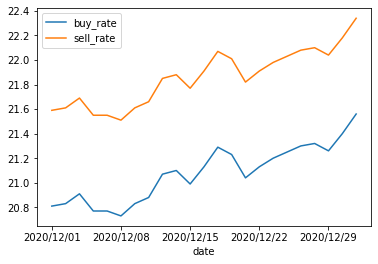

----------------------------------------

加拿大幣(CAD)



<Figure size 720x576 with 0 Axes>

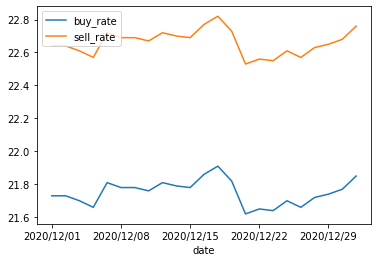

----------------------------------------

新加坡幣(SGD)



<Figure size 720x576 with 0 Axes>

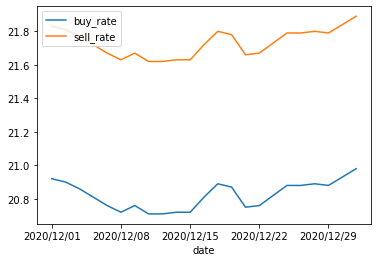

----------------------------------------

瑞士法郎(CHF)



<Figure size 720x576 with 0 Axes>

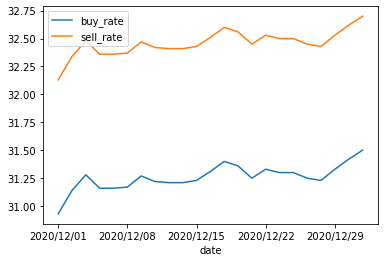

----------------------------------------

日圓(JPY)



<Figure size 720x576 with 0 Axes>

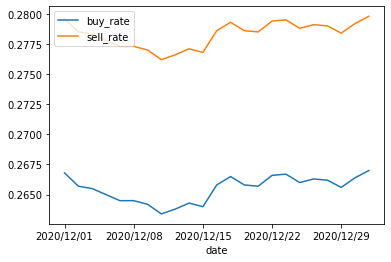

----------------------------------------

南非幣(ZAR)



<Figure size 720x576 with 0 Axes>

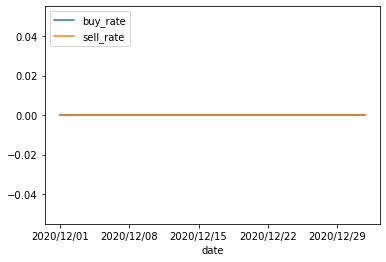

----------------------------------------

瑞典幣(SEK)



<Figure size 720x576 with 0 Axes>

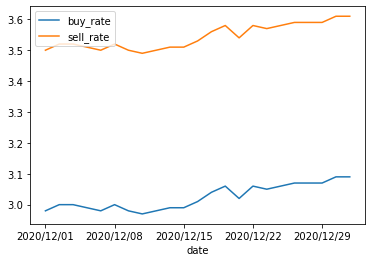

----------------------------------------

紐元(NZD)



<Figure size 720x576 with 0 Axes>

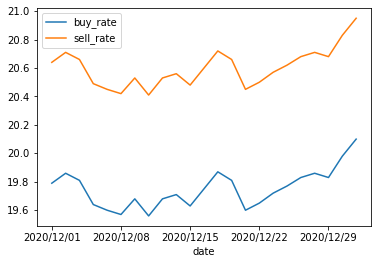

----------------------------------------

泰幣(THB)



<Figure size 720x576 with 0 Axes>

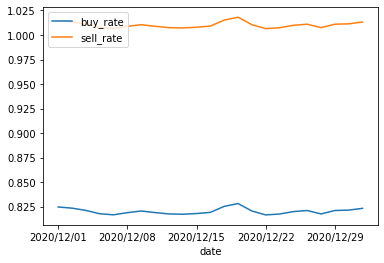

----------------------------------------

菲國比索(PHP)



<Figure size 720x576 with 0 Axes>

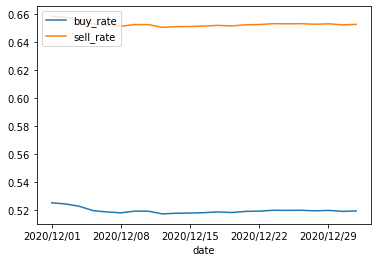

----------------------------------------

印尼幣(IDR)



<Figure size 720x576 with 0 Axes>

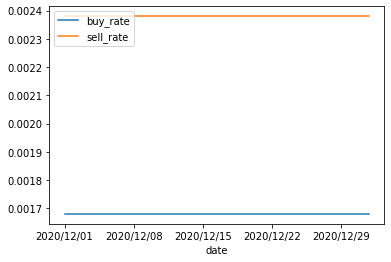

----------------------------------------

歐元(EUR)



<Figure size 720x576 with 0 Axes>

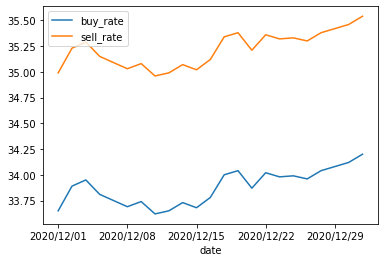

----------------------------------------

韓元(KRW)



<Figure size 720x576 with 0 Axes>

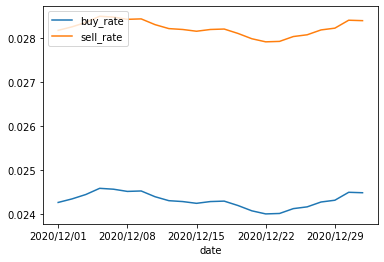

----------------------------------------

越南盾(VND)



<Figure size 720x576 with 0 Axes>

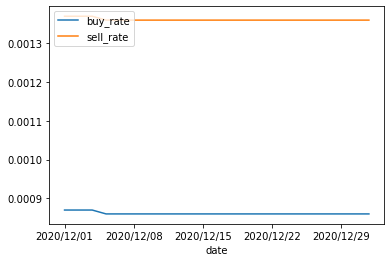

----------------------------------------

馬來幣(MYR)



<Figure size 720x576 with 0 Axes>

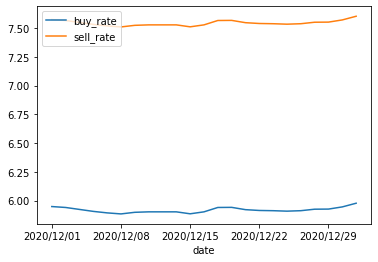

----------------------------------------

人民幣(CNY)



<Figure size 720x576 with 0 Axes>

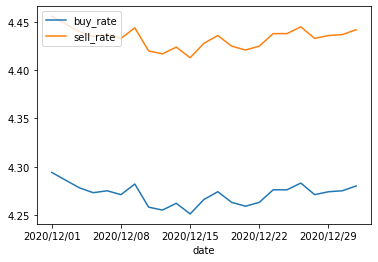

----------------------------------------


In [10]:
'''

  Your code here

'''
# 先到牌告匯率首頁，爬取所有貨幣的種類
url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"
resp = requests.get(url)
resp.encoding = 'utf-8'
html = BeautifulSoup(resp.text, "lxml")
rate_table = html.find(name='table', attrs={'title':'牌告匯率'}).find(name='tbody').find_all(name='tr')

for i, d in enumerate(rate_table):
    try:
        # 擷取匯率表格，把美金(也就是匯率表的第一個元素)擷取出來，查詢其歷史匯率
        currency = rate_table[i].find(name='div', attrs={'class':'visible-phone print_hide'})
        print(currency.get_text().replace(" ", ""))  # 貨幣種類

        # 針對美金，找到其「歷史匯率」的首頁 
        history_link = rate_table[i].find(name='td', attrs={'data-table':'歷史匯率'})
        history_rate_link = "https://rate.bot.com.tw" + history_link.a["href"]  # 該貨幣的歷史資料首頁

        #
        # 到貨幣歷史匯率網頁，選則該貨幣的「歷史區間」，送出查詢後，觀察其網址變化情形，再試著抓取其歷史匯率資料
        #
        # 用「quote/年-月」去取代網址內容，就可以連到該貨幣的歷史資料
        quote_history_url = history_rate_link.replace("history", "quote/2020-12")
        resp = requests.get(quote_history_url)
        resp.encoding = 'utf-8'
        history = BeautifulSoup(resp.text, "lxml")
        history_table = history.find(name='table', attrs={'title':'歷史本行營業時間牌告匯率'}).find(name='tbody').find_all(name='tr')

        #
        # 擷取到歷史匯率資料後，把資料彙整起來並畫出趨勢圖
        #
        date_history = []
        history_buy = []
        history_sell = []

        for history_rate in history_table:
            # 擷取日期資料
            date_string = history_rate.a.get_text()
            date = datetime.strptime(date_string, '%Y/%M/%d').strftime('%Y/%M/%d')  # 轉換日期格式
            date_history.append(date)  # 日期歷史資料

            history_ex_rate = history_rate.find_all(name='td', attrs={'class':'rate-content-cash text-right print_table-cell'})
            history_buy.append(float(history_ex_rate[0].get_text()))  # 歷史買入匯率
            history_sell.append(float(history_ex_rate[1].get_text()))  # 歷史賣出匯率

        # 將匯率資料建成dataframe形式
        HistoryExchangeRate = pd.DataFrame({'date': date_history,
                                            'buy_rate':history_buy,
                                            'sell_rate':history_sell})

        HistoryExchangeRate = HistoryExchangeRate.set_index('date')  # 指定日期欄位為datafram的index
        HistoryExchangeRate = HistoryExchangeRate.sort_index(ascending=True)

        # 畫出歷史匯率軌跡圖
        plt.figure(figsize=(10, 8))
        HistoryExchangeRate[['buy_rate','sell_rate']].plot()  # x=['date'], y=[['buy_rate','sell_rate']] 
        plt.legend(loc="upper left")
        plt.show()
        print("-"*40)
    except:
        print("-"*40)
        continue